# SP22: Machine Learning for Signal Processing - Assignment 5


## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [8]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from numpy import linalg as LA
import os
import math
import seaborn as sns
import librosa as lb
from hmmlearn import hmm
import warnings
warnings.filterwarnings("ignore")
# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## P1: Kernel PCA

In [2]:
# Loading the concentric data file

con = scipy.io.loadmat('concentric.mat')
con_X = con['X']

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '2D plot of data')

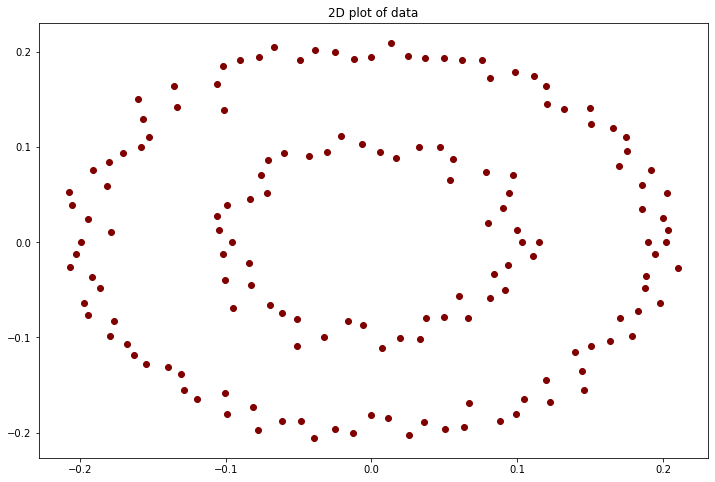

In [3]:
# Plotting the 2D of concentric data

plt.figure(figsize=[12,8])
x = con_X[0]
y = con_X[1]
plt.scatter(x, y, color = 'maroon')
plt.title("2D plot of data")
plt.show()

### Transforming data into 3D feature space

X ∈ R
2×152 ⇒ Kernel PCA ⇒ Z ∈ R
3×152

In [4]:
# Function for RBF kernel

def RBFkernel(a,b):
  return (-((a-b).T @ (a-b)))

In [5]:
# Converting data from 2D space to 3D feature space

kernel_mat = np.zeros((con_X.shape[1], con_X.shape[1]))
for i in range(con_X.shape[1]):
    for j in range(con_X.shape[1]):
      kernel_mat[i,j] = np.exp(RBFkernel(con_X[:,i], con_X[:,j]))

In [6]:
# Eigen decomposition 
U, S, V = LA.svd(kernel_mat)

# Kernel PCA
Y = U[:,0:3].T @ kernel_mat

Text(0.5, 0.92, '3D plot of data - Linearly seperable data')

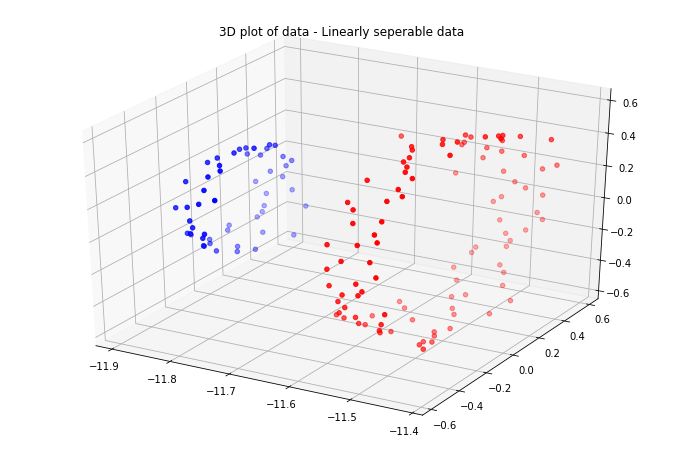

In [7]:
# Plotting data in 3D space

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(Y[0][:51], Y[1][:51], Y[2][:51], c='b')
ax.scatter3D(Y[0][51:], Y[1][51:], Y[2][51:], c='r')
plt.title("3D plot of data - Linearly seperable data")
plt.show()

In [8]:
# Getting target variables

y_true = np.ones(con_X.shape[1])
y_true[0:51] = 0

### Perceptron implementation

In [27]:
# Sigmoid Activation Function
def sigmoidActivation(x):
  return 1/(1+np.exp(-x))

# Derivative of Sigmoid function 
def sigmoidDerivative(x):
  return sigmoidActivation(x) * (1- sigmoidActivation(x))

In [28]:
# Initialization of weights

Wts = np.random.normal(0, 1, size=(1, 4))
alpha = 0.001
bias = np.ones((1,Y.shape[1]))
X = np.empty((4, Y.shape[1]))
total_error = []

In [29]:
# Perceptron implementation

for i in range(200000):

  # Forward Propogation
  X[0:3] = Y
  X[3] = bias
  forward = np.matmul(Wts, X) 
  y_pred = sigmoidActivation(forward)
  error = np.sum(((y_pred - y_true)**2)/2)
  total_error.append(error)

  # Backward Propogation
  error_bp = (y_pred-y_true) * sigmoidDerivative(forward)
  Wts_delta = np.matmul(error_bp, np.transpose(X))

  # Updating the weights
  Wts = Wts - (alpha * Wts_delta)

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Number of Epochs')

Text(0, 0.5, 'Total Error')

Text(0.5, 1.0, 'Convergence for Perceptron')

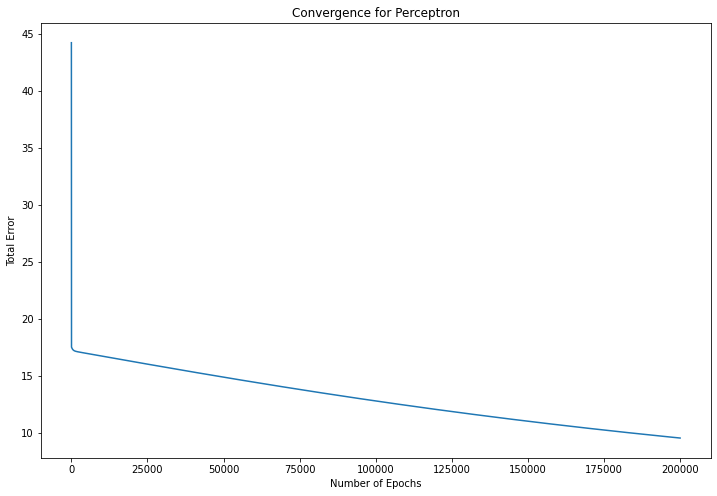

In [30]:
# Plotting error for different iterations 

plt.figure(figsize=[12,8]);
plt.plot(total_error)
plt.xlabel('Number of Epochs');
plt.ylabel('Total Error');
plt.title('Convergence for Perceptron');
plt.show()

In [31]:
# Function to calculate accuracy

def accuracyCalc(y_true, y_pred):
  return np.sum(np.round(y_pred) == y_true)*100/len(y_true)

In [32]:
# Caculating accuracy of the model

acuuracy = accuracyCalc(y_true, y_pred)
print("Accuracy of the model", "%.0f%%" % acuuracy)

Accuracy of the model 100%


## P2: Neural Networks

In [15]:
# Loading the concentric data file

con = scipy.io.loadmat('concentric.mat')
con_X = con['X']

In [16]:
# Getting target variables

y_true = np.ones(con_X.shape[1])
y_true[0:51] = 0

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '2D plot of data')

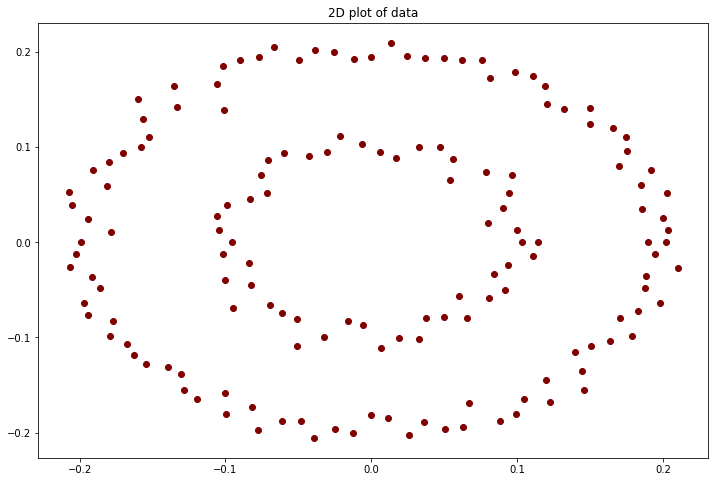

In [17]:
# Plotting the 2D of concentric data

plt.figure(figsize=[12,8])
x = con_X[0]
y = con_X[1]
plt.scatter(x, y, color = 'maroon')
plt.title("2D plot of data")
plt.show()

### Multi layer perceptron implementation

In [18]:
# Initialization of weights for 2 layers (inlcuding hidde layer)

Wts_layer1 = np.random.normal(0, 1, size=(3, 3))
Wts_layer2 = np.random.normal(0, 1, size=(1, 4))
alpha = 0.02
bias = np.ones((1,con_X.shape[1]))  
X1 = np.empty((3, con_X.shape[1]))
X2 = np.empty((4, con_X.shape[1]))
total_error = []

In [19]:
# Multi layer perceptron implementation

for i in range(200000):

    # Forward propogation
    X1[0:2] = con_X
    X1[2] = bias
    forward1 = np.matmul(Wts_layer1, X1)
    temp_X2 = sigmoidActivation(forward1)
    X2[0:3] = temp_X2
    X2[3] = bias
    forward2 = np.matmul(Wts_layer2, X2)
    y_pred = sigmoidActivation(forward2)
    
    error = np.sum(((y_pred - y_true)**2)/2)
    total_error.append(error)
    
    # Backword propogation
    error_layer2 = (y_pred-y_true) * sigmoidDerivative(forward2)
    wts2_delta = np.matmul(error_layer2, np.transpose(X2))
    error_layer1 = (np.matmul(np.transpose(Wts_layer2), error_layer2))[0:3] * sigmoidDerivative(forward1)
    wts1_delta = np.matmul(error_layer1, np.transpose(X1))
    
    # Updating the 2 layers weights 
    Wts_layer1 = Wts_layer1 - (alpha * wts1_delta)
    Wts_layer2 = Wts_layer2 - (alpha * wts2_delta)

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Number of Epochs')

Text(0, 0.5, 'Total Error')

Text(0.5, 1.0, 'Convergence for Perceptron')

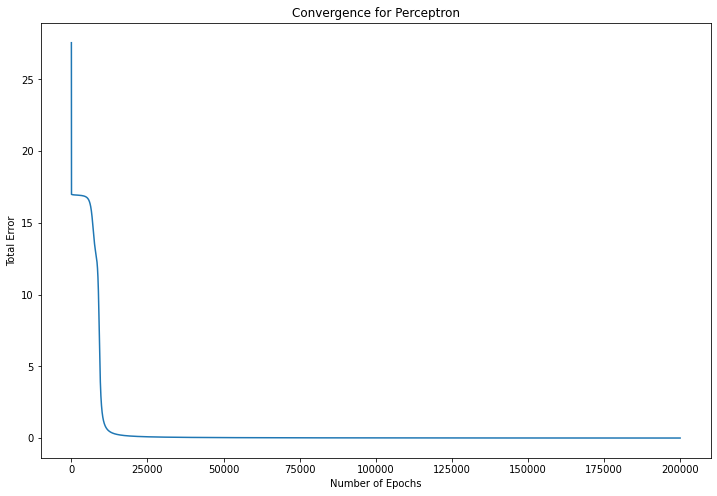

In [20]:
# Plotting error for different iterations 

plt.figure(figsize=[12,8]);
plt.plot(total_error)
plt.xlabel('Number of Epochs');
plt.ylabel('Total Error');
plt.title('Convergence for Perceptron');
plt.show()

In [21]:
# Caculating accuracy of the model

acuuracy = accuracyCalc(y_true, y_pred)
print("Accuracy of the model", "%.0f%%" % acuuracy)

Accuracy of the model 100%


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Actual Values')

Text(0.5, 1.0, 'Predicted Values')

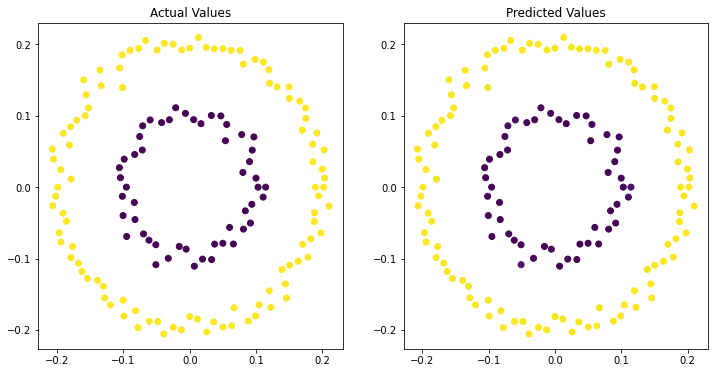

In [22]:
# Plotting target values before and after prediction 

plt.figure(figsize=[12,6]);
plt.subplot(1, 2, 1)
plt.scatter(con_X[0],con_X[1], c = y_true)
plt.title("Actual Values")

plt.subplot(1, 2, 2)
plt.scatter(con_X[0], con_X[1], c = y_pred)
plt.title("Predicted Values")

# P3: Spoken MNIST

In [4]:
# Loading the input directory

input_dir = "Data/Jakobovski-free-spoken-digit-dataset-e9e1155/recordings" 
data_list = os.listdir(input_dir)

In [5]:
# Extracting only audio files of Jcakson

jackson_audio = []
for i in data_list:
    if "jackson" in i:
        jackson_audio.append(i)

In [6]:
# Separating data for digits

X_train = []
for i in range(10):
    file_name = str(i) + '_' + 'jackson'
    digit_data = []
    for j in jackson_audio:
        if file_name in j:
            digit_data.append(j)
    X_train.append(digit_data)

In [9]:
# Loading the recordings and creating MFCC matrices for train and test data

XC_train = [[]]*10
TC_train = [[]]*10
XC_test = [[]]*10
TC_test = [[]]*10
hmm_models = {}    
    
for i in range(10):

    XC = []
    TC = []
    for j in X_train[i]:
        X, SR = lb.load(os.path.join(input_dir,j))
        mfcc = lb.feature.mfcc(y = X, sr = SR)   
        XC.append(mfcc)
        TC.append(mfcc.shape[1])
    
    XC_train[i] = XC[0:45]
    TC_train[i] = TC[0:45]
    XC_test[i] = XC[45:50]
    TC_test[i] = TC[45:50]
    
    # Training the GMMHMM models for all digits
    hmm_models[i] = hmm.GMMHMM(n_components=2, n_mix=1, min_covar=0.001, startprob_prior=1.0, \
                            transmat_prior=1.0, weights_prior=1.0, means_prior=0.0, means_weight=0.0, \
                            covars_prior=None, covars_weight=None, algorithm='viterbi', covariance_type='diag', \
                            random_state=None, n_iter=50, tol=0.01, verbose=False, params='stmcw', \
                            init_params='stmcw', implementation='log')

In [10]:
# Fitting the models and testing them for all digits

final_scores = []
total_scores = []

for i in range(10):
    hmm_models[i].fit(np.hstack(XC_train[i]).T,TC_train[i])
    
for i in range(10):
    model_scores = []
    for j in range(10):
        score = hmm_models[j].score(np.hstack(XC_test[i]).T,TC_test[i])
        model_scores.append(score)
        # Storing all the model scores
        total_scores.append(model_scores)
    
    # Storing only highest scores for each model
    final_scores.append(np.argmax(np.array(model_scores)))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

GMMHMM(covars_prior=array([[[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]],

       [[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]]]),
       covars_weight=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_prior=array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]]),
       means_weight=array([[0.],
       [0.]]), n_components=2, n_iter=50,
       weights_prior=array([[1.],
       [1.]]))

In [11]:
total_scores

[[-9951.909334700897,
  -11144.770181498374,
  -10881.969516232031,
  -10995.748660165933,
  -12120.035604827774,
  -12451.239643746527,
  -12785.61112315513,
  -13009.562337629073,
  -12026.018699963968,
  -12507.099734911493],
 [-9951.909334700897,
  -11144.770181498374,
  -10881.969516232031,
  -10995.748660165933,
  -12120.035604827774,
  -12451.239643746527,
  -12785.61112315513,
  -13009.562337629073,
  -12026.018699963968,
  -12507.099734911493],
 [-9951.909334700897,
  -11144.770181498374,
  -10881.969516232031,
  -10995.748660165933,
  -12120.035604827774,
  -12451.239643746527,
  -12785.61112315513,
  -13009.562337629073,
  -12026.018699963968,
  -12507.099734911493],
 [-9951.909334700897,
  -11144.770181498374,
  -10881.969516232031,
  -10995.748660165933,
  -12120.035604827774,
  -12451.239643746527,
  -12785.61112315513,
  -13009.562337629073,
  -12026.018699963968,
  -12507.099734911493],
 [-9951.909334700897,
  -11144.770181498374,
  -10881.969516232031,
  -10995.7486601

In [12]:
final_scores

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
# Creating a dataframe to plot confusion matrix for ground-truth digit class labels and the predictions

y_true = pd.Series([i for i in range(10)], name='y_true')
y_pred = pd.Series(final_scores, name='y_pred')

df_predictions = pd.DataFrame() 
df_predictions = pd.crosstab(y_true, y_pred)
df_predictions

y_pred,0,1,2,3,4,5,6,7,8,9
y_true,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='y_pred', ylabel='y_true'>

Text(0.5, 1.0, 'Confusion Matrix')

Text(87.0, 0.5, 'Predictions')

Text(0.5, 51.0, 'Ground-truth digit class labels')

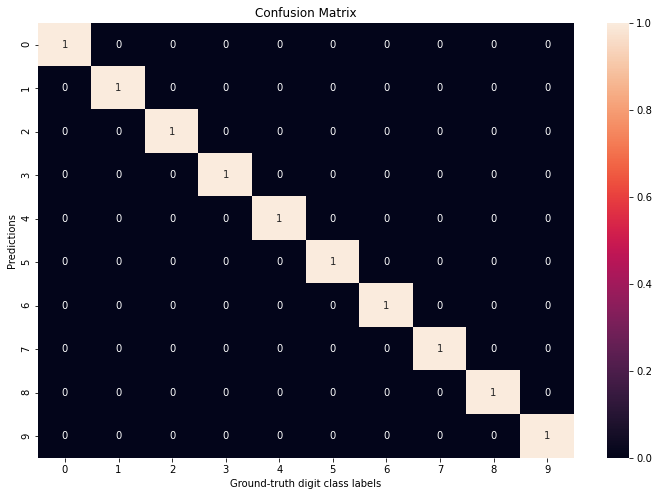

In [14]:
# Plotting a heat-map

plt.figure(figsize=[12,8]);
sns.heatmap(df_predictions, annot=True, vmax = 1, vmin = 0)
plt.title("Confusion Matrix")
plt.ylabel("Predictions")
plt.xlabel("Ground-truth digit class labels")